In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_excel('CASE_RentabilidadeAnalítica.xlsx', header=1).round(2)

In [3]:
df.rename({
    'Net MDR' : 'Net MDR (Receita)', 
    'Aluguel' : 'Aluguel (Receita)', 
    'Pre-pagamento' : 'Pre-pagamento (Receita)',
    'Total': 'Total (Receita)', 
    'Pre-pagamento.1' : 'Pre-pagamento (Custos)', 
    'Equipamento/Logística' : 'Equipamento/Logística (Custos)', 
    'Comissões' : 'Comissões (Custos)',
    'Transacionais' : 'Transacionais (Custos)', 
    'Outros' : 'Outros (Custos)', 
    'Total.1' : 'Total (Custos)', 
}, axis=1, inplace=True)

In [4]:
df.head(3)

,Número do Cliente,MCC,Data Apuração,Data de Entrada do Cliente,Canal,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR (Receita),Aluguel (Receita),Pre-pagamento (Receita),Total (Receita),Pre-pagamento (Custos),Equipamento/Logística (Custos),Comissões (Custos),Transacionais (Custos),Outros (Custos),Total (Custos),Lucro
0,100910138884288,5309,2016-10-01,2016-01-07,Canal 3,Niterói,189012.41,2235.0,122.27,74.09,0.00,196.36,0.00,-141.11,0.0,-143.14,-46.39,-330.64,-134.28
1,100101693498007,5963,2016-10-01,2015-12-10,Canal 3,Rio de Janeiro,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-13.00,0.0,0.00,0.00,-13.00,-13.00
2,100990966870135,5814,2016-10-01,2016-03-29,Canal 3,Rio de Janeiro,240922.64,1190.0,1149.34,143.38,4317.06,5609.78,-1525.63,-312.13,0.0,-108.58,-146.24,-2092.58,3517.21


# Pré-porcessamento

In [5]:
X = df.drop(labels=['Número do Cliente', 'Data Apuração', 'Data de Entrada do Cliente'], axis=1)

In [6]:
X.head()

,MCC,Canal,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR (Receita),Aluguel (Receita),Pre-pagamento (Receita),Total (Receita),Pre-pagamento (Custos),Equipamento/Logística (Custos),Comissões (Custos),Transacionais (Custos),Outros (Custos),Total (Custos),Lucro
0,5309,Canal 3,Niterói,189012.41,2235.0,122.27,74.09,0.00,196.36,0.00,-141.11,0.0,-143.14,-46.39,-330.64,-134.28
1,5963,Canal 3,Rio de Janeiro,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-13.00,0.0,0.00,0.00,-13.00,-13.00
2,5814,Canal 3,Rio de Janeiro,240922.64,1190.0,1149.34,143.38,4317.06,5609.78,-1525.63,-312.13,0.0,-108.58,-146.24,-2092.58,3517.21
3,7230,Canal 3,Niterói,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-24.01,-24.01,-24.01
4,7997,Canal 1,Brasília,3634.70,56.0,61.73,0.00,0.00,61.73,0.00,0.00,0.0,-12.58,-52.55,-65.13,-3.39


In [7]:
print('Tamanho df:', len(X))
print('Duplicados:', len(X) - len(X.drop_duplicates()))

Tamanho df: 12456
Duplicados: 820


In [8]:
X.isnull().sum()

MCC                               0
Canal                             0
Cidade                            0
Volume Transacionado              0
Quantidade de Transações          0
Net MDR (Receita)                 0
Aluguel (Receita)                 0
Pre-pagamento (Receita)           0
Total (Receita)                   0
Pre-pagamento (Custos)            0
Equipamento/Logística (Custos)    0
Comissões (Custos)                0
Transacionais (Custos)            0
Outros (Custos)                   0
Total (Custos)                    0
Lucro                             0
dtype: int64

In [9]:
X.dtypes

MCC                                 int64
Canal                              object
Cidade                             object
Volume Transacionado              float64
Quantidade de Transações          float64
Net MDR (Receita)                 float64
Aluguel (Receita)                 float64
Pre-pagamento (Receita)           float64
Total (Receita)                   float64
Pre-pagamento (Custos)            float64
Equipamento/Logística (Custos)    float64
Comissões (Custos)                float64
Transacionais (Custos)            float64
Outros (Custos)                   float64
Total (Custos)                    float64
Lucro                             float64
dtype: object

In [10]:
X['Canal'].unique()

array(['Canal 3', 'Canal 1', 'Canal 2'], dtype=object)

In [11]:
X['Canal'].replace({'Canal 1':int(1), 'Canal 2':int(2), 'Canal 3':int(3)}, inplace=True)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
X[['Cidade']] = ord_enc.fit_transform(X[['Cidade']])

In [13]:
X.head()

,MCC,Canal,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR (Receita),Aluguel (Receita),Pre-pagamento (Receita),Total (Receita),Pre-pagamento (Custos),Equipamento/Logística (Custos),Comissões (Custos),Transacionais (Custos),Outros (Custos),Total (Custos),Lucro
0,5309,3,196.0,189012.41,2235.0,122.27,74.09,0.00,196.36,0.00,-141.11,0.0,-143.14,-46.39,-330.64,-134.28
1,5963,3,263.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-13.00,0.0,0.00,0.00,-13.00,-13.00
2,5814,3,263.0,240922.64,1190.0,1149.34,143.38,4317.06,5609.78,-1525.63,-312.13,0.0,-108.58,-146.24,-2092.58,3517.21
3,7230,3,196.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-24.01,-24.01,-24.01
4,7997,1,43.0,3634.70,56.0,61.73,0.00,0.00,61.73,0.00,0.00,0.0,-12.58,-52.55,-65.13,-3.39


In [14]:
X.dtypes

MCC                                 int64
Canal                               int64
Cidade                            float64
Volume Transacionado              float64
Quantidade de Transações          float64
Net MDR (Receita)                 float64
Aluguel (Receita)                 float64
Pre-pagamento (Receita)           float64
Total (Receita)                   float64
Pre-pagamento (Custos)            float64
Equipamento/Logística (Custos)    float64
Comissões (Custos)                float64
Transacionais (Custos)            float64
Outros (Custos)                   float64
Total (Custos)                    float64
Lucro                             float64
dtype: object

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X[X.columns] = min_max.fit_transform(X[X.columns])

In [16]:
X.Canal.unique()

array([1. , 0. , 0.5])

# Cluster

<AxesSubplot:>

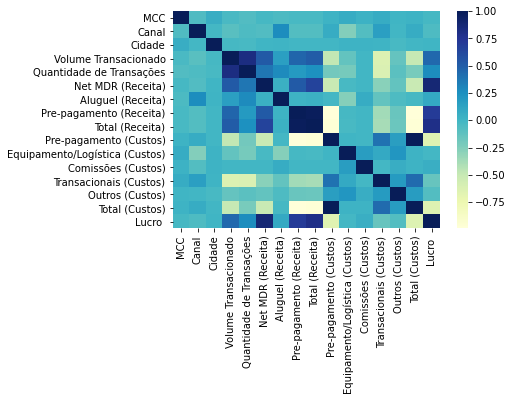

In [17]:
corr = X.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [18]:
from sklearn.cluster import KMeans

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

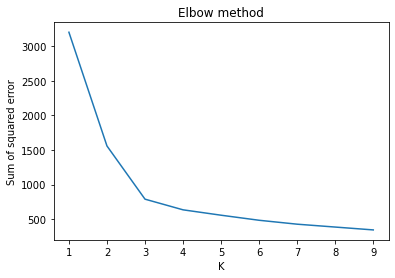

In [19]:
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

range_n_clusters = [2, 3, 4, 5, 6]
random_st = 10
silhouette_avg = []
davies_bouldin_avg = []

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_st)
    cluster_labels = clusterer.fit_predict(X)

    # valores mais altos indicam clusters mais bem definidos (-1,1)
    silhouette_avg.append( silhouette_score(X, cluster_labels) )
    # valores mais baixos indicam melhor agrupamento (0 é o valor mínimo)
    davies_bouldin_avg.append( davies_bouldin_score(X, cluster_labels) )

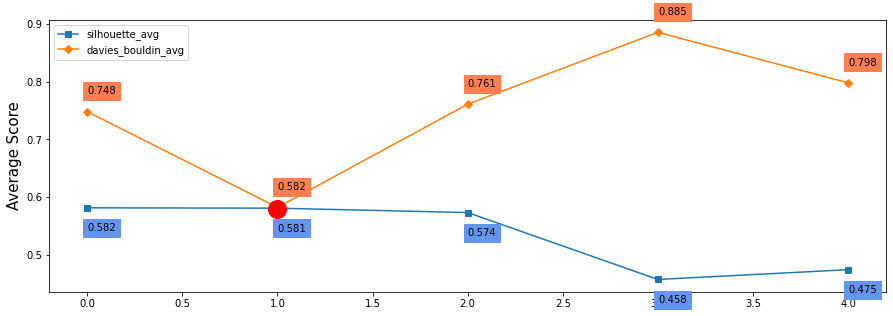

In [21]:
fig = plt.figure(figsize=(15,5))
plt.plot(silhouette_avg, marker='s')
plt.plot(davies_bouldin_avg, marker='D')
plt.legend(['silhouette_avg', 'davies_bouldin_avg'])
plt.plot(1, 0.58, marker='o', color='red', markersize=18)
plt.ylabel('Average Score', fontsize=15)

for i in range(len(silhouette_avg)):
    plt.text( i, silhouette_avg[i]-0.04, round(silhouette_avg[i], 3), backgroundcolor='cornflowerblue' )
    plt.text( i, davies_bouldin_avg[i]+0.03, round(davies_bouldin_avg[i], 3), backgroundcolor='coral' )

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5817307551818927
For n_clusters = 3 The average silhouette_score is : 0.5810530037875399
For n_clusters = 4 The average silhouette_score is : 0.5735119980229172


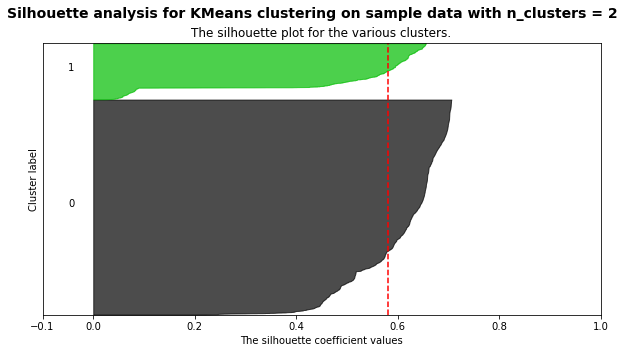

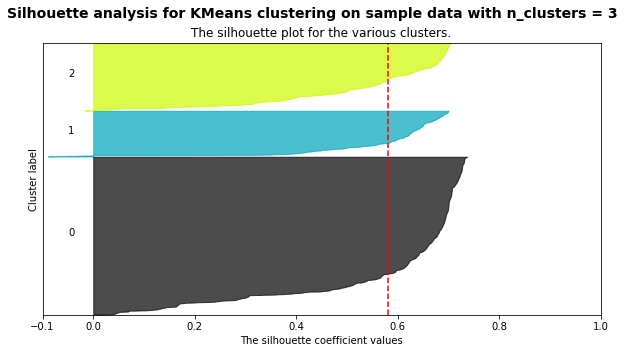

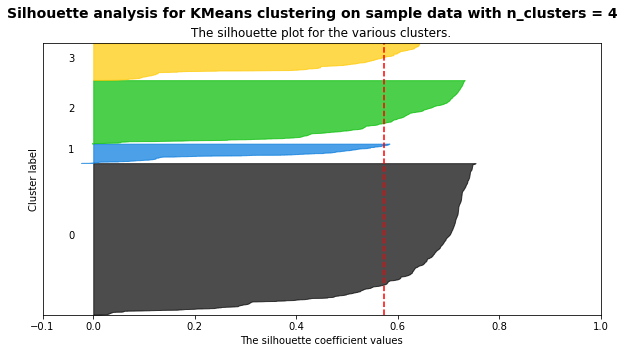

In [22]:
from sklearn.metrics import silhouette_samples

range_n_clusters = [2, 3, 4]
random_st = 10

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=random_st)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [23]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(X)
df['Grupos'] = pd.Series(clusters)

In [24]:
print(len(df))
print(len(X))

12456
12456


In [25]:
df.head()

,Número do Cliente,MCC,Data Apuração,Data de Entrada do Cliente,Canal,Cidade,Volume Transacionado,Quantidade de Transações,Net MDR (Receita),Aluguel (Receita),Pre-pagamento (Receita),Total (Receita),Pre-pagamento (Custos),Equipamento/Logística (Custos),Comissões (Custos),Transacionais (Custos),Outros (Custos),Total (Custos),Lucro,grupos
0,100910138884288,5309,2016-10-01,2016-01-07,Canal 3,Niterói,189012.41,2235.0,122.27,74.09,0.00,196.36,0.00,-141.11,0.0,-143.14,-46.39,-330.64,-134.28,1
1,100101693498007,5963,2016-10-01,2015-12-10,Canal 3,Rio de Janeiro,0.00,0.0,0.00,0.00,0.00,0.00,0.00,-13.00,0.0,0.00,0.00,-13.00,-13.00,1
2,100990966870135,5814,2016-10-01,2016-03-29,Canal 3,Rio de Janeiro,240922.64,1190.0,1149.34,143.38,4317.06,5609.78,-1525.63,-312.13,0.0,-108.58,-146.24,-2092.58,3517.21,1
3,100112746462403,7230,2016-10-01,2016-07-26,Canal 3,Niterói,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-24.01,-24.01,-24.01,1
4,100101114264588,7997,2016-10-01,2016-04-13,Canal 1,Brasília,3634.70,56.0,61.73,0.00,0.00,61.73,0.00,0.00,0.0,-12.58,-52.55,-65.13,-3.39,2


In [26]:
# df.to_excel('base_clientes.xlsx', index=False, encoding='utf-8')